# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

In [1]:
from google.colab import drive   
drive.mount('/content/gdrive')  # change working path of google colab

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/My Drive/Colab Notebooks/20191119_D001Q1"
import os
os.chdir(path)
!ls   #確認path已經到local目錄

Day001_read_image_HW.ipynb		Day003_color_spave_op_Sample.ipynb
Day001_read_image_Sample.ipynb		Day004_geometric_transform_HW.ipynb
Day002_change_color_space_HW.ipynb	Day004_Sample.ipynb
Day002_change_color_space_Sample.ipynb	Part01
Day003_color_spave_op_HW.ipynb


In [3]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt

img_path = 'Part01/GF_4.jpg'
img = cv2.imread(img_path)
img.shape

(3216, 2000, 3)

## 上下左右翻轉圖片

In [0]:
# 水平翻轉 (horizontal)
img_hflip = img[:,::-1, :]

# 垂直翻轉 (vertical)
img_vflip = img[::-1, :, :]

# 水平 + 垂直翻轉
img_hvflip = img[::-1, ::-1, :]

# 組合 + 顯示圖片
hflip = np.hstack((img, img_hflip))
vflip = np.hstack((img_vflip, img_hvflip))
img_flip = np.vstack((hflip, vflip))

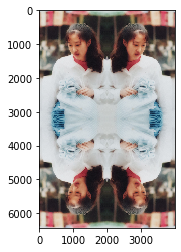

In [5]:
img_rgb_down = cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_down)

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

In [10]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片
img_zoom = np.hstack((img_area_scale, img_cubic_scale))


INTER_NEAREST zoom cost 0.035019636154174805
INTER_CUBIC zoom cost 0.05910682678222656


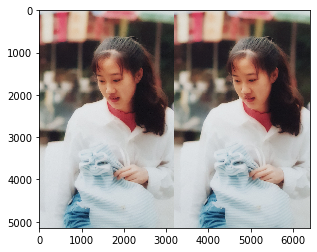

In [11]:
img_rgb_zoom = cv2.cvtColor(img_zoom, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_zoom)

In [12]:
img_cubic_scale.shape

(5144, 3200, 3)

## 平移幾何轉換

In [13]:
img.shape

(3216, 2000, 3)

In [15]:
M = np.array([[1, 0, 100],
              [0, 1, 50]], dtype=np.float32)
M.shape

(2, 3)

In [16]:
M

array([[  1.,   0., 100.],
       [  0.,   1.,  50.]], dtype=float32)

In [0]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M = np.array([[1, 0, 50],
              [0, 1, 100]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img))


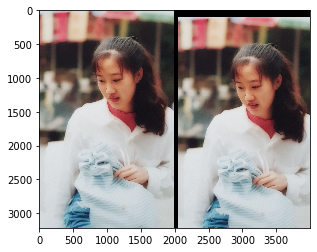

In [19]:
img_rgb_shift = cv2.cvtColor(img_shift, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_shift)